In [5]:
import torch
import os
from typing import List
from typing import Optional, Union
import torchvision
from torchvision.utils import make_grid
from skimage import io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd


In [6]:
seed=3
torch.manual_seed(seed)


In [7]:
ROOT='../../data'
BASE_DIR=os.path.join(ROOT, 'celeba')
IMAGES=os.path.join(BASE_DIR, 'img_align_celeba')
IMAGE_SIZE=64

print(BASE_DIR)

../../data/celeba


In [8]:
def get_celeb_list(base_dir: os.path) -> List[str]:
    image_dir = os.path.join(base_dir, 'img_align_celeba')
    with open(os.path.join(base_dir, 'identity_CelebA.txt')) as f:
        lines = f.readlines()
        print(f'number of lines is {len(lines)}')
        result = []
        for name, _ in (line.split(' ') for line in lines):
            result.append(os.path.join(image_dir, name))
        return sorted(result)
                    

celebs = get_celeb_list(BASE_DIR)
print(celebs[:5])
print(len(celebs))

        
        
        


number of lines is 202599
['../../data/celeba/img_align_celeba/000001.jpg', '../../data/celeba/img_align_celeba/000002.jpg', '../../data/celeba/img_align_celeba/000003.jpg', '../../data/celeba/img_align_celeba/000004.jpg', '../../data/celeba/img_align_celeba/000005.jpg']
202599


In [9]:
class CelebADataset(Dataset):
    def __init__(self, root: str, train: bool=False, split: float=0.8, transforms: torchvision.transforms=None) -> None:
        self._root = root
        if not os.path.isdir(self._root):
            return None
        img_list = get_celeb_list(root)
        total_len = len(img_list)
        train_len = int(split * total_len)
        
        test_len = total_len - train_len
        print(f'train_len is {train_len}, test_len = {test_len}')
        if train is True:
          self._celeb_img_list = img_list[:train_len] 
        else:
          self._celeb_img_list = img_list[-test_len:]
        self._transforms = transforms
        
    def __len__(self):
        return len(self._celeb_img_list)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.toList()
        sample = Image.open(self._celeb_img_list[idx]).convert("RGB")
        if self._transforms:
            sample = self._transforms(sample)
        return sample

In [10]:
def get_transforms():
  return torchvision.transforms.Compose([
      torchvision.transforms.Resize(IMAGE_SIZE),
      torchvision.transforms.CenterCrop(IMAGE_SIZE),
      torchvision.transforms.ToTensor(),
      torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
  ])

In [11]:
dataset = CelebADataset(root=BASE_DIR, train=True, transforms=get_transforms())
it = iter(dataset)
print(len(dataset))

test_dataset = CelebADataset(root=BASE_DIR)
test_it = iter(test_dataset)
print(len(test_dataset))


number of lines is 202599
train_len is 162079, test_len = 40520
162079
number of lines is 202599
train_len is 162079, test_len = 40520
40520


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 530, 530])
torch.Size([530, 530, 3])


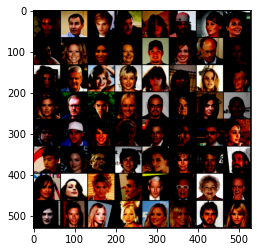

In [12]:
train_dl = DataLoader(dataset, batch_size=64, shuffle=True)
batch = iter(train_dl).next()

img_grid = make_grid(batch)
#plt.figure(20, 20)
print(img_grid.shape)
image = img_grid.permute(1, 2, 0)
print(image.shape)
plt.imshow(image)
plt.show()